In [ ]:

# WINE DATASET - CLASS 2 ACCURACY is BAD (becoz the dataset is more non linear)
# IRIS DATASET has overall good accuracy > 90


def linear_predicted(x,w):
  return np.dot(x,w)

def logistic_predicted_sigmoid(x,w):
  return 1/(1+ pow(math.e,-(np.dot(x,w))))
  
def linear_w_update(x,y,alpha,w):

  for j in range(len(w)):
    subtract_part = 0

    for i in range(len(x)):
      subtract_part = subtract_part + (linear_predicted(x[i],w)-y[i])*x[i][j]

    w[j] = w[j] - (alpha*subtract_part)/len(x)

  return w

def logistic_w_update(x,y,alpha,w):

  for j in range(len(w)):
    subtract_part = 0

    for i in range(len(x)):
      subtract_part = subtract_part + (logistic_predicted_sigmoid(x[i],w)-y[i])*x[i][j]*(logistic_predicted_sigmoid(x[i],w))*(1-logistic_predicted_sigmoid(x[i],w))

    w[j] = w[j] - (alpha*subtract_part)/len(x)

  return w



def error_linear(x,y,w):

  J = 0
  for i in range(len(x)):

    J = J + pow((linear_predicted(x[i],w)-y[i]),2)

  J = J/(2*len(x))

  return J

def error_logistic(x,y,w):
  J = 0

  for i in range(len(x)):
    J = J + (y[i]*math.log(logistic_predicted_sigmoid(x[i],w),10)) + ((1-y[i])*math.log(1-logistic_predicted_sigmoid(x[i],w),10))

  J = -J/(len(x))

  return J



def cal_MSE_batch(df,w,alpha,rho,epochs,showPlot):

  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  J = 0

  prevJ = 0

  itr = 0

  epoch_graph = []
  mse_graph = []

  while True:

    if(itr >= epochs):
      break


    h = []

    

    w = linear_w_update(x,y,alpha,w)
    # w = logistic_w_update(x,y,alpha,w)

    
    J = 0

    J = error_linear(x,y,w)

    # print(J)
    # J = error_logistic(x,y,w)

    mse_graph.append(J)
    epoch_graph.append(itr)


    if(abs(J-prevJ) <= rho):
      break

    prevJ = J
    itr = itr + 1

  

  if(showPlot==1):
    plt.plot(epoch_graph,mse_graph)
    plt.xlabel("EPOCHS")
    # naming the y axis
    plt.ylabel("MSE")
    plt.show()
  return w,J



def cal_MSE_stoch(df,w,alpha,rho,epochs,showPlot):

  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  J = 0

  prevJ = 0

  itr = 0

  epoch_graph = []
  mse_graph = []

  while True:

    if(itr >= epochs):
      break


    h = []


    for i in range(len(x)):

      # predicted value must be changed
      predicted_value = logistic_predicted_sigmoid(x[i],w)
      # predicted_value = logistic_predicted_sigmoid(x[i],w)
      h.append(predicted_value)

      # gradient
      # J = J + pow(predicted_value - y[i],2)

      # stocastic - logloss
      J = J + (y[i]*math.log(predicted_value,10)) + ((1-y[i])*math.log(1-predicted_value,10))

      for j in range(len(w)):

        # logloss-logistic, gradient-stocastic - MSE
        w[j] = w[j] - alpha*(predicted_value-y[i])*x[i][j]

        # logistic - MSE
        # w[j] = w[j] - alpha*(predicted_value-y[i])*x[i][j]*predicted_value*(1-predicted_value)


    # J = J/(2*len(x))

    J = -J/(len(x))

    

    mse_graph.append(J)
    epoch_graph.append(itr)

    # shuffling.
    df = df.sample(frac = 1)



    if(abs(J-prevJ) <= rho):
      break

    prevJ = J
    itr = itr + 1

  
  # print(mse_graph)
  # print(epoch_graph)

  if(showPlot != ''):
    plt.plot(epoch_graph,mse_graph,label=str(showPlot))
    plt.xlabel("EPOCHS")
    # naming the y axis
    plt.ylabel("MSE")
    plt.legend()
    # plt.show()
  return w,J

      
      



89
35
54

Best HyperParameterIndex :  2
Best Hyperparameters(alpha,rho,epoch) :  0.1 0.0 1000

****TRAIN - ACCURACY*****

Correctly Predicted :  62
Total Test Samples :  89
Testing Accuracy :  69.66292134831461

confusionMatrix :
[[32  3  4]
 [ 2 30 18]
 [ 0  0  0]]

precision for  0  class :  0.8205128205128205
precision for  1  class :  0.6
precision for  2  class :  nan

recall for  0  class :  0.9411764705882353
recall for  1  class :  0.9090909090909091
recall for  2  class :  0.0

****TEST - ACCURACY*****

Correctly Predicted :  40
Total Test Samples :  54
Testing Accuracy :  74.07407407407408

confusionMatrix :
[[17  1  2]
 [ 1 23 10]
 [ 0  0  0]]

precision for  0  class :  0.85
precision for  1  class :  0.6764705882352942
precision for  2  class :  nan

recall for  0  class :  0.9444444444444444
recall for  1  class :  0.9583333333333334
recall for  2  class :  0.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:255: RuntimeWarning: invalid value encountered in long_scalars


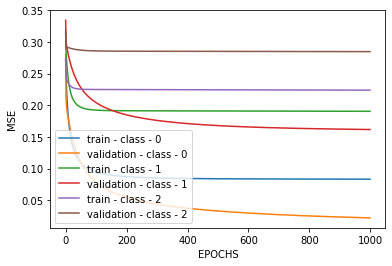

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math



'''
PRE-PROCCESSING STARTS
'''



data = pd.DataFrame((datasets.load_wine()).data)
target = pd.DataFrame((datasets.load_wine()).target)

targetarr = np.array(target.values)



df = data;
df = df/(df.max().max())
df.insert(loc=len(df.columns),column = 'last',value=target)
df.insert(loc=0,column='-1',value=[1 for i in range(len(df))])

# shuffling DataFrame

df = df.sample(frac = 1)

'''

for binary classification
df = df[df['last']!=2]

'''
# df = df[df['last']!=2]

# print(df)

# print(df)

# split the dataset in x:y:z

x = 50
y = 20
z = 30
train_set, reamining_set = train_test_split(df,train_size = x/100)
validation_set, test_set = train_test_split(reamining_set,train_size = y/(y+z))
print(len(train_set))
print(len(validation_set))
print(len(test_set))




alphaarr = np.array([0.1,0.001,0.1,0.03,0.15])
rhoarr = np.array([0.0001,0.011,0,0.001,0.0001])
epocharr = np.array([100,200,1000,400,500])

w = ([random.randint(0,1) for i in range(len(df.columns)-1)])

# df,w,alpha,rho,epochs


'''
PRE-PROCCESSING ENDS
'''

print()


'''
HYPER-PARAMETER - TUNING STARTS
'''

classes = np.unique(np.array(list(df['last'])))
# working fine
# print(classes)

# 150
# print(len(df['last']))

def hyperParameterTuning(classes,validation_set):
  hyperParameterFrequency = {}
  for c in classes:

    # df
    validCopy = validation_set.copy(deep=True)

    # series -> list, why error when accessed with validCopy.loc(i,'last')
    # reference for resolution -> https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index , not yet resolved
    validCopyOutput = list(validCopy['last'])


    
    for i in range(len(validCopyOutput)):
      if(validCopyOutput[i] == c):
        validCopyOutput[i] = 1
      else:
        validCopyOutput[i] = 0

    validCopy['last'] = validCopyOutput
    
    # for each class vs all
    validationError = []
    for i in range(len(alphaarr)):
      returnedW,error = cal_MSE_stoch(validCopy,w.copy(),alphaarr[i],rhoarr[i],epocharr[i],'')
      # print(error)
      validationError.append(error)

    # print(validationError)

    minValidationErrorIndex = validationError.index(min(validationError))

    if(minValidationErrorIndex in hyperParameterFrequency):
      hyperParameterFrequency[minValidationErrorIndex] += 1
    else:
      hyperParameterFrequency[minValidationErrorIndex] = 1



  # print(hyperParameterFrequency)

  bestHyperParameterIndex = 0

  if(bestHyperParameterIndex not in hyperParameterFrequency):
    hyperParameterFrequency[bestHyperParameterIndex] = 0

  for i in hyperParameterFrequency:
    if(hyperParameterFrequency[i] > hyperParameterFrequency[bestHyperParameterIndex]):
      bestHyperParameterIndex = i


  print('Best HyperParameterIndex : ',bestHyperParameterIndex)
  print('Best Hyperparameters(alpha,rho,epoch) : ',alphaarr[bestHyperParameterIndex],rhoarr[bestHyperParameterIndex],epocharr[bestHyperParameterIndex] )

  return bestHyperParameterIndex


'''
HYPER-PARAMETER TUNING ENDED
'''
    




'''
TRAINING + OVERFITTING - STARTED
'''

def trainAndOverFit(classes,train_set,validation_set,bestHyperParameterIndex):
  everyClassW = []


  for c in classes:

    trainCopy = train_set.copy(deep=True)

    trainCopyOutput = list(trainCopy['last'])

    for i in range(len(trainCopyOutput)):
      if(trainCopyOutput[i]==c):
        trainCopyOutput[i] = 1
      else:
        trainCopyOutput[i] = 0

    trainCopy['last'] = trainCopyOutput
    returnedW,error = cal_MSE_stoch(trainCopy,w.copy(),alphaarr[bestHyperParameterIndex],rhoarr[bestHyperParameterIndex],epocharr[bestHyperParameterIndex],'train - class - '+str(c))
    # print(error)

    everyClassW.append(returnedW)

    validCopy = validation_set.copy(deep=True)

    validCopyOutput = list(validCopy['last'])

    for i in range(len(validCopyOutput)):
      if(validCopyOutput[i]==c):
        validCopyOutput[i] = 1
      else:
        validCopyOutput[i] = 0

    validCopy['last'] = validCopyOutput
    returnedW,error = cal_MSE_stoch(validCopy,w.copy(),alphaarr[bestHyperParameterIndex],rhoarr[bestHyperParameterIndex],epocharr[bestHyperParameterIndex],'validation - class - '+str(c))
    # print(error)

  return everyClassW




'''
TRAINING + OVERFITTING - ENDED
'''

  


'''
TESTING - STARTED
'''

def findAccuracy(classes,df,everyClassW):

  # Confusion Matrix
  confusionMatrix = np.zeros((len(classes),len(classes)),dtype='int')



  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  # for each pattern predict H(Xi) for all classes then take max probability

  correctlyPredicted = 0

  for i in range(len(a)):

    predictedForIthPattern = []
    for c in classes:
      predictedForIthPattern.append(logistic_predicted_sigmoid(everyClassW[c],x[i]))
    # print(predictedForIthPattern)

    # predicting the class.
    predictedClass = predictedForIthPattern.index(max(predictedForIthPattern))


    confusionMatrix[predictedClass][int(y[i])] += 1

    if(predictedClass == y[i]):
      correctlyPredicted += 1

  print('Correctly Predicted : ',correctlyPredicted)
  print('Total Test Samples : ', len(a))
  print('Testing Accuracy : ',(correctlyPredicted*100)/len(a))

  print()
  print('confusionMatrix :' )
  print(confusionMatrix)
  print()




  for i in range(len(confusionMatrix)):
    print('precision for ',i,' class : ',confusionMatrix[i][i]/(sum(confusionMatrix[i])))

  print()

  colWiseSum_ConfusionMatrix = np.sum(confusionMatrix,axis=0)
  for i in range(len(colWiseSum_ConfusionMatrix)):
    print('recall for ',i,' class : ',confusionMatrix[i][i]/(colWiseSum_ConfusionMatrix[i]))

  return (correctlyPredicted*100)/len(a)







'''
TESTING - ENDED
'''


# '''

bestHyperParameterIndex = hyperParameterTuning(classes,validation_set)
everyClassW = trainAndOverFit(classes,train_set.copy(),validation_set.copy(),bestHyperParameterIndex)
print()
print("****TRAIN - ACCURACY*****\n")
findAccuracy(classes,train_set.copy(),everyClassW)

print()

print("****TEST - ACCURACY*****\n")
findAccuracy(classes,test_set.copy(),everyClassW)

print()

# '''




Best HyperParameterIndex :  2
Best Hyperparameters(alpha,rho,epoch) :  0.1 0.0 1000
--------------
Correctly Predicted :  15
Total Test Samples :  18
Testing Accuracy :  83.33333333333333

confusionMatrix :
[[6 0 0]
 [0 7 0]
 [1 2 2]]

precision for  0  class :  1.0
precision for  1  class :  1.0
precision for  2  class :  0.4

recall for  0  class :  0.8571428571428571
recall for  1  class :  0.7777777777777778
recall for  2  class :  1.0
--------------
--------------
Correctly Predicted :  11
Total Test Samples :  18
Testing Accuracy :  61.111111111111114

confusionMatrix :
[[4 0 1]
 [0 7 6]
 [0 0 0]]

precision for  0  class :  0.8
precision for  1  class :  0.5384615384615384
precision for  2  class :  nan

recall for  0  class :  1.0
recall for  1  class :  1.0
recall for  2  class :  0.0
--------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:255: RuntimeWarning: invalid value encountered in long_scalars


--------------
Correctly Predicted :  10
Total Test Samples :  18
Testing Accuracy :  55.55555555555556

confusionMatrix :
[[4 3 3]
 [0 6 2]
 [0 0 0]]

precision for  0  class :  0.4
precision for  1  class :  0.75
precision for  2  class :  nan

recall for  0  class :  1.0
recall for  1  class :  0.6666666666666666
recall for  2  class :  0.0
--------------
--------------
Correctly Predicted :  13
Total Test Samples :  18
Testing Accuracy :  72.22222222222223

confusionMatrix :
[[ 3  1  0]
 [ 1 10  3]
 [ 0  0  0]]

precision for  0  class :  0.75
precision for  1  class :  0.7142857142857143
precision for  2  class :  nan

recall for  0  class :  0.75
recall for  1  class :  0.9090909090909091
recall for  2  class :  0.0
--------------
--------------
Correctly Predicted :  13
Total Test Samples :  18
Testing Accuracy :  72.22222222222223

confusionMatrix :
[[10  0  1]
 [ 0  3  4]
 [ 0  0  0]]

precision for  0  class :  0.9090909090909091
precision for  1  class :  0.42857142857142855

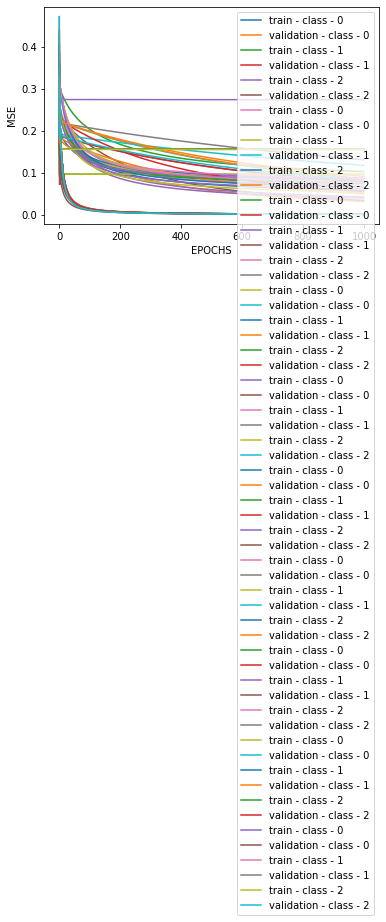

In [ ]:
# must divide 


def getKFold(k,df):

    
  dfKFolds = np.array_split(df, k)

  return dfKFolds

def runKFold(k,df):

  everyClassW = []
  avgAccuracy = 0

  # shuffling the dataset
  df = df.sample(frac = 1)

  folds = getKFold(k,df)

  bestHyperParameterIndex = -1

  for i in range(k):

    # take current i as test_set

    trainSet = None
    testSet = folds[i].copy(deep = True)

    for j in range(k):
      if(i!=j):
        if(trainSet is None):
          trainSet = folds[j].copy(deep = True)
        else:
          trainSet.append(folds[j].copy(deep = True))

  # considering 10% validation
    trainSet,validationSet = train_test_split(trainSet,train_size = 90/100)


    if(bestHyperParameterIndex == -1):
      bestHyperParameterIndex = hyperParameterTuning(classes,validationSet.copy(deep = True))

    everyClassW = trainAndOverFit(classes,trainSet.copy(deep = True),validationSet.copy(deep = True),bestHyperParameterIndex)

    print('--------------')
    accuracy = findAccuracy(classes,testSet,everyClassW)
    avgAccuracy += accuracy

    # avgAccuracy += accuracy
    
    print('--------------')


  avgAccuracy /= k

  print('AVG Accuracy : ',avgAccuracy)



# k = 10
runKFold(10,df.copy())




  





FOLD :  1
Correctly Predicted :  26
Total Test Samples :  36
Testing Accuracy :  72.22222222222223

confusionMatrix :
[[10  2  1]
 [ 0 13  5]
 [ 0  2  3]]

precision for  0  class :  0.7692307692307693
precision for  1  class :  0.7222222222222222
precision for  2  class :  0.6

recall for  0  class :  1.0
recall for  1  class :  0.7647058823529411
recall for  2  class :  0.3333333333333333
--------------
FOLD :  2
Correctly Predicted :  25
Total Test Samples :  36
Testing Accuracy :  69.44444444444444

confusionMatrix :
[[10  0  2]
 [ 0 13  6]
 [ 2  1  2]]

precision for  0  class :  0.8333333333333334
precision for  1  class :  0.6842105263157895
precision for  2  class :  0.4

recall for  0  class :  0.8333333333333334
recall for  1  class :  0.9285714285714286
recall for  2  class :  0.2
--------------
FOLD :  3
Correctly Predicted :  26
Total Test Samples :  36
Testing Accuracy :  72.22222222222223

confusionMatrix :
[[11  1  0]
 [ 0 13  5]
 [ 3  1  2]]

precision for  0  class : 

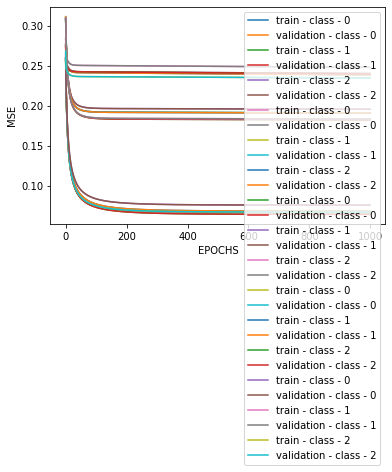

In [ ]:
from sklearn.model_selection import KFold

# https://stackoverflow.com/questions/19155718/select-pandas-rows-based-on-list-index
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html



kf = KFold(n_splits=5)
kf

avgAccuracy = 0
foldNum = 1
for train_index, test_index in kf.split(np.array(df.values)):

  trainDf = df.iloc[train_index]
  testDf = df.iloc[test_index]

  bestHyperParameterIndex = 2


  print('FOLD : ',foldNum)

  everyClassW = trainAndOverFit(classes,trainDf.copy(deep = True),trainDf.copy(deep = True),bestHyperParameterIndex)
  accuracy = findAccuracy(classes,testDf,everyClassW)
  avgAccuracy += accuracy

  print('--------------')


  foldNum += 1

  

avgAccuracy /= 5

print('AVG Accuracy : ',avgAccuracy)




In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data.values, list(target[0]), test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
history = model.fit(x_train, y_train)

model.score(x_test, y_test)*100




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


98.14814814814815